In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from vision.tools.image_stitching import resize_img, find_keypoints, match_descriptors
from vision.tools.image_stitching import calc_affine_transform, calc_homography

from vision.tools.sensors_alignment import align_sensors

In [2]:
def plot_two_img(img1, img2):
    f, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].imshow(img1)
    ax[1].imshow(img2)

In [3]:
zed_frame = "/home/fruitspec-lab/FruitSpec/Sandbox/merge_sensors/ZED/frame_548.jpg"
depth_frame = "/home/fruitspec-lab/FruitSpec/Sandbox/merge_sensors/ZED/depth_frame_548.jpg"
jai_frame = "/home/fruitspec-lab/FruitSpec/Sandbox/merge_sensors/FSI_2_30_720_30/frame_539.jpg"
rgb_jai_frame = "/home/fruitspec-lab/FruitSpec/Sandbox/merge_sensors/FSI_2_30_720_30/rgb_539.jpg"

In [4]:
jai = cv2.imread(jai_frame)
jai = cv2.cvtColor(jai, cv2.COLOR_BGR2RGB)
rgb_jai = cv2.imread(rgb_jai_frame)
rgb_jai = cv2.cvtColor(rgb_jai, cv2.COLOR_BGR2RGB)
zed = cv2.imread(zed_frame)
zed = cv2.rotate(zed, cv2.ROTATE_90_CLOCKWISE)
zed = cv2.cvtColor(zed, cv2.COLOR_BGR2RGB)
depth = cv2.imread(depth_frame)
depth = cv2.rotate(depth, cv2.ROTATE_90_CLOCKWISE)
depth = cv2.cvtColor(depth, cv2.COLOR_BGR2RGB)

In [5]:
corr = align_sensors(zed, rgb_jai)

In [11]:
corr = list(corr.astype(np.int))

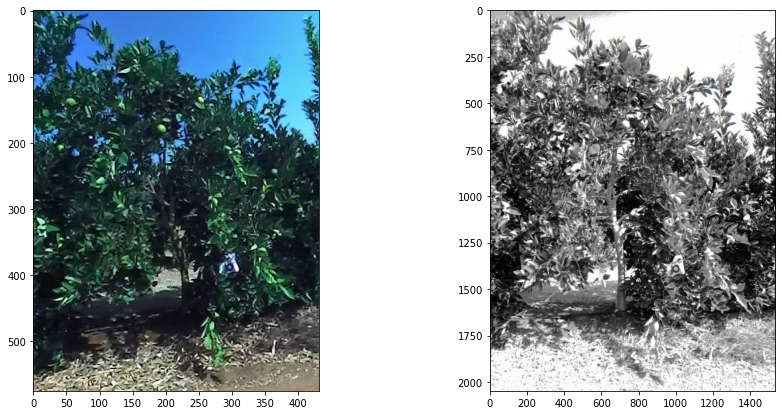

In [12]:
plot_two_img(zed[corr[1]:corr[3],corr[0]:corr[2],:], rgb_jai)

In [10]:
corr[1]

356.5

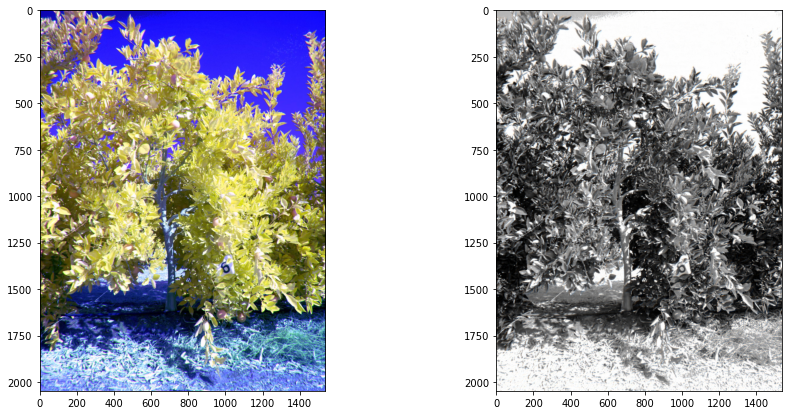

In [51]:
plot_two_img(jai, rgb_jai)

In [52]:
grey_zed = cv2.cvtColor(zed, cv2.COLOR_RGB2GRAY)
grey_jai = cv2.cvtColor(rgb_jai, cv2.COLOR_RGB2GRAY)

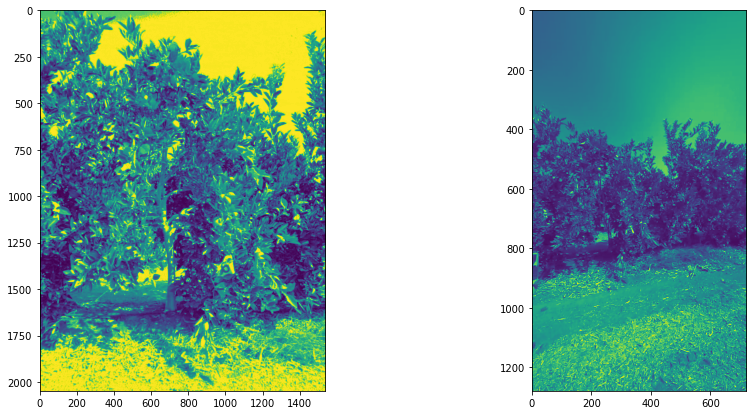

In [53]:
plot_two_img(grey_jai, grey_zed)

In [54]:
zed_angle_h = 110
zed_angle_w = 70
#jai_angle_w = 62
jai_angle_h = 62

In [22]:
#jai_angle_h = np.int((grey_jai.shape[0] / grey_jai.shape[1]) * jai_angle_w)

In [55]:
jai_angle_w = np.int((grey_jai.shape[1] / grey_jai.shape[0]) * jai_angle_h)

In [23]:
jai_angle_h

82

In [56]:
z_mid_h = int(grey_zed.shape[0]/2)
z_mid_w = int(grey_zed.shape[1]/2)
zed_half_height =  int(z_mid_h / (zed_angle_h / 2) * (jai_angle_h / 2))
zed_half_width =  int(z_mid_w / (zed_angle_w / 2) * (jai_angle_w / 2))

In [60]:
#cropped_zed = grey_zed[z_mid_h - zed_half_height: z_mid_h + zed_half_height, z_mid_w - zed_half_width: z_mid_w + zed_half_width]
cropped_zed = grey_zed[z_mid_h - zed_half_height: z_mid_h + zed_half_height, 0: z_mid_w + zed_half_width]

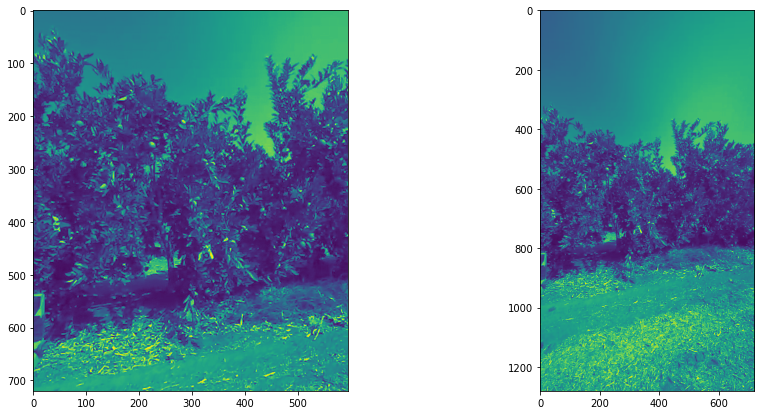

In [61]:
plot_two_img(cropped_zed, grey_zed)

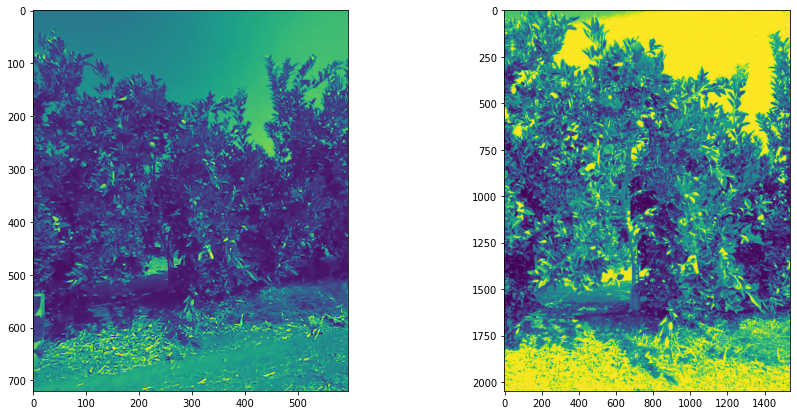

In [67]:
plot_two_img(cropped_zed, grey_jai)

In [69]:
im_zed ,r_zed = resize_img(cropped_zed, 960)
im_jai, r_jai = resize_img(grey_jai, 960)

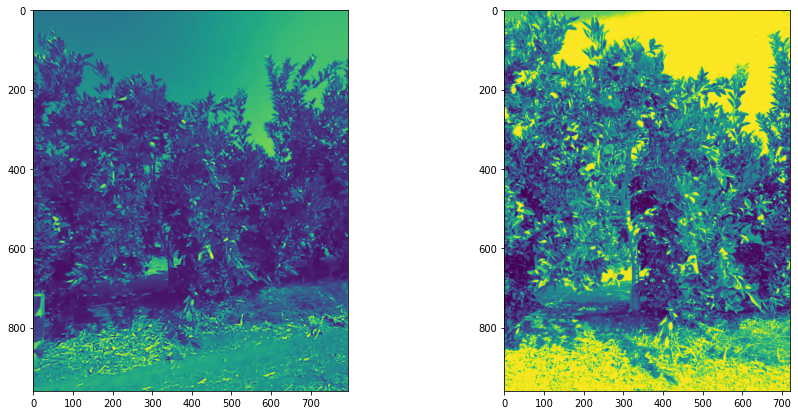

In [70]:
plot_two_img(im_zed, im_jai)

In [71]:
kp_zed, des_zed = find_keypoints(im_zed)
kp_jai, des_jai = find_keypoints(im_jai)

In [72]:
match = match_descriptors(des_zed, des_jai)

In [73]:
M, st = calc_homography(kp_zed, kp_jai, match)

In [74]:
M

array([[ 1.05762063e+00,  6.53530726e-02, -3.11581537e+01],
       [-7.73118862e-03,  9.54627873e-01,  9.68645882e+01],
       [ 2.60527211e-04,  3.16404394e-05,  1.00000000e+00]])

In [77]:
M1, _ = calc_affine_transform(kp_zed, kp_jai, match)

In [78]:
M1

array([[ 7.93127848e-01,  4.62844824e-02,  4.46179649e+01],
       [-2.96445185e-02,  7.97684529e-01,  1.02713175e+02]])

In [88]:
sx = np.sqrt(M1[0,0]**2 + M1[0,1]**2)
sy = np.sqrt(M1[1,0]**2 + M1[1,1]**2)

In [89]:
sx

0.7944772093955877

In [90]:
sy

0.7982351821514083

In [106]:
tx = int(M1[0,2])

In [107]:
ty = int(M1[1,2])

In [108]:
new_h_j = int(im_jai.shape[0] * sy)
new_w_j = int(im_jai.shape[1] * sx)

In [109]:
new_w_j

572

In [110]:
new_h_j

766

In [118]:
disp = im_zed.copy()
disp = cv2.rectangle(disp, (tx, ty), (tx+new_w_j, ty + new_h_j), (255), 2)

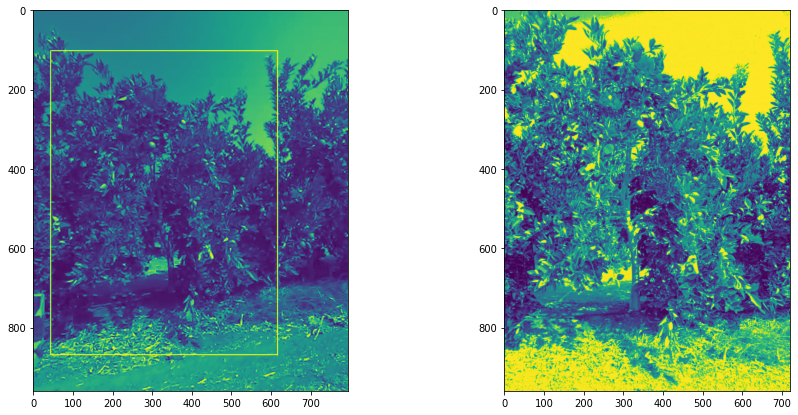

In [119]:
plot_two_img(disp, im_jai)

In [120]:
final = im_zed[ty:ty+new_h_j,tx:tx+new_w_j]

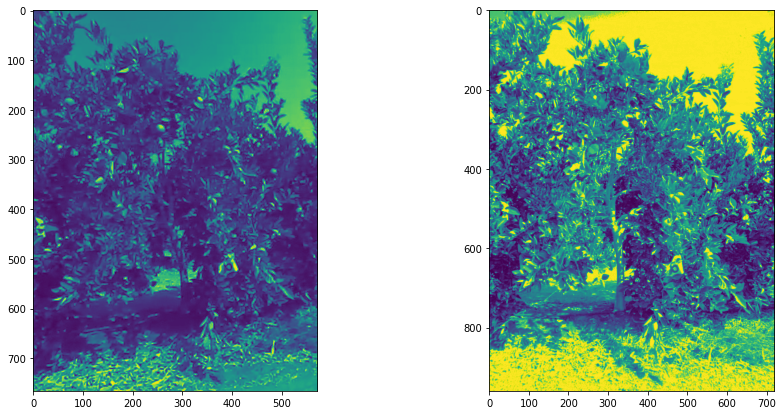

In [121]:
plot_two_img(final, im_jai)

In [13]:
im_jai.shape

NameError: name 'im_jai' is not defined